## Imports

In [ ]:
import pandas as pd
import numpy as np

import functions.visualization_functions as VisualizationFunctions
import functions.model_functions as ModelFunctions

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [2]:
df_churn_filtered = pd.read_csv('datasets/churn_filtered.csv')

In [3]:
df_churn_filtered.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,No Offer,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,Male,46,No,0,0,9,No Offer,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,3,3,No Offer,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


In [4]:
df_churn_filtered.columns.tolist()

['Gender',
 'Age',
 'Married',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Customer Status']

In [5]:
df_churn_filtered.shape

(6589, 31)

## Treinamento

In [6]:
TARGET = "Customer Status"
RANDOM_STATE = 42

In [7]:
X_train, X_test, y_train, y_test = ModelFunctions.model_train_test(df_churn_filtered, TARGET)

In [8]:
print(f'X_train - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_train - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')
print(f'X_test - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_test - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')

X_train - Proporção da classe 0: 0.7183434518647008
y_train - Proporção da classe 1: 0.2816565481352992
X_test - Proporção da classe 0: 0.7183434518647008
y_test - Proporção da classe 1: 0.2816565481352992


In [9]:
X_train_processed, X_test_processed = ModelFunctions.model_pre_process(df_churn_filtered, TARGET, X_train, X_test)

### Subir mlflow

In [10]:
ModelFunctions.mlflow_up('Predição de Churn agora vai em hd')

### SVM

In [11]:
# svm_model = SVC()

# svm_rs_run_id, svm_rs_model = ModelFunctions.supervised_rand_search_cv(svm_model, ModelFunctions.PARAM_GRID_SVM, X_train_processed, X_test_processed, y_train, y_test)

### XGBoost

In [12]:
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# xgb_rs_run_id, xgb_rs_model = ModelFunctions.supervised_rand_search_cv(xgb_model, ModelFunctions.PARAM_GRID_XGB, X_train_processed, X_test_processed, y_train, y_test)

### GradientBoost

In [13]:
# gradientboost_model = GradientBoostingClassifier()

# gradientboost_rs_run_id, gradientboost_rs_model = ModelFunctions.supervised_rand_search_cv(gradientboost_model, ModelFunctions.PARAM_GRID_GRADIENTBOOST, X_train_processed, X_test_processed, y_train, y_test)

### AdaBoost

In [14]:
adaboost_model = AdaBoostClassifier(random_state=RANDOM_STATE)

adaboost_rs_run_id, adaboost_rs_model = ModelFunctions.supervised_rand_search_cv(adaboost_model, ModelFunctions.PARAM_GRID_ADABOOST, X_train_processed, X_test_processed, y_train, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/marqsleal/Dev/Python/ml-tempalte-poc/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/marqsleal/Dev/Python/ml-tempalte-poc/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/marqsleal/Dev/Python/ml-tempalte-poc/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/marqsleal/Dev/Python/ml-tempalte-poc/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (

MLflow Run ID: 8f5674bc2dd943e58d0e8babb741248d
Melhores parâmetros: {'n_estimators': 200, 'learning_rate': 0.1}
Precisão (acurácia): 0.8639352554375316


## Visulizar Modelo

In [19]:
adaboost_rs_run_id

'8f5674bc2dd943e58d0e8babb741248d'

8f5674bc2dd943e58d0e8babb741248d 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1407
           1       0.82      0.68      0.74       570

    accuracy                           0.86      1977
   macro avg       0.85      0.81      0.82      1977
weighted avg       0.86      0.86      0.86      1977

ROC AUC score: 0.9349


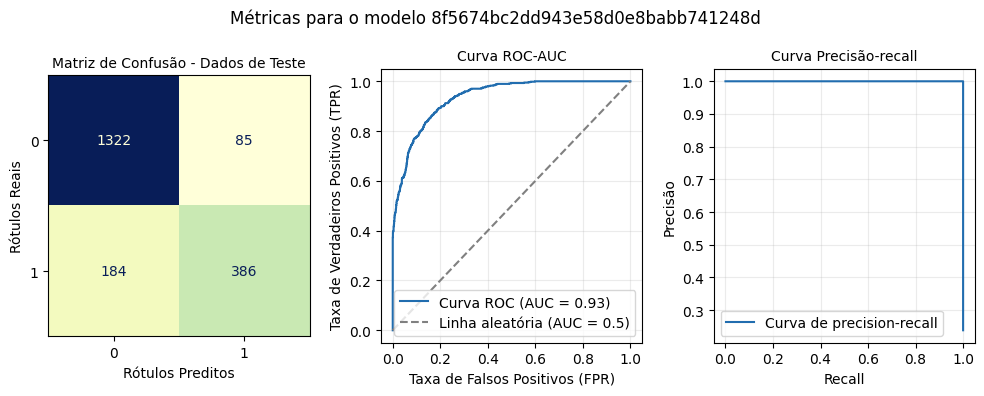

<Figure size 768x576 with 0 Axes>

In [15]:
VisualizationFunctions.cm_roc_recall_plot(adaboost_rs_run_id, adaboost_rs_model, X_train_processed, X_test_processed, y_train, y_test)

In [18]:
VisualizationFunctions.model_metrics({
    adaboost_rs_run_id: adaboost_rs_model,
#    svm_rs_run_id, svm_rs_model,
    }, 
    X_train_processed, 
    X_test_processed, 
    y_train, 
    y_test
)

,Modelo,Precisão,Acurácia,Recall,f1-score (weighted),f1-score (macro avg)
0,8f5674bc2dd943e58d0e8babb741248d,0.819533,0.863935,0.677193,0.859777,0.824625
